<h1>Classification Using Simple Neural Network</h1>

# Input Library and Upload Dataset

In [ ]:
# Library yang digunakan
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.utils.data as td

Data yang digunakan merupakan klasifikasi jenis biji gandum berdasarkan panjang, lebar, koefisien asimetris, dan groove length

In [ ]:
wheatseeds = pd.read_csv('seeds.csv').dropna()

## Untuk memudahkan klasifikasi, maka jumlah data harus diperbesar
for i in range(1,3):
    wheatseeds = wheatseeds.append(wheatseeds)

# Splitting Data

Data yang didapat kemudian dibagi menjadi dua, yaitu untuk training dan testing. Pembagian data tersebut menggunakan rasio 70% data training dan 30% data testing.

In [ ]:
# Menggunakan library sklearn untuk mempermudah splitting data
from sklearn.model_selection import train_test_split

seeds_classes = ['Kama', 'Rosa', 'Canadian']
features = ['kernel_length','kernel_width','asymmetry_coefficient','groove_length']
label = 'species'
   
# Data dibagi degan rasio 70:30 untuk training dan testing
x_train, x_test, y_train, y_test = train_test_split(wheatseeds[features].values,
                                                    wheatseeds[label].values,
                                                    test_size=0.30,
                                                    random_state=0)


# Prepare Data with Pytorch

Baik data training maupun testing kemudian diubah ke dalam bentuk tensor menggunakan Pytorch. Fungsinya adalah untuk menyimpan dan melakukan operasi dengan multidimensional data.

In [ ]:
# Data training dalam tensor
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Data testing dalam tensor
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Neural Network

Neural network yang digunakan memiliki 2 layer yaitu layer input dan layer output yang masing-masing terhubung dengan hidden layer berjumlah 10. Layer input menerima nilai input data untuk setiap atribut yang diteruskan ke hidden layer menggunakan activation function (sigmoid). Sedangkan output layer menghasilkan nilai output dari hidden layer.

In [ ]:
# jumlah fitur/atribut yang digunakan
input_dim = len(features)

# jumlah hidden layer
hidden_layers = 10

# jumlah kelas
output_dim = len(seeds_classes)

# Neural Network
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.linear1 = nn.Linear(input_dim, hidden_layers)
    self.linear2 = nn.Linear(hidden_layers, output_dim)
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x

Untuk menghitung loss, digunakan fungsi Cross Entropy Loss dan dan akan dioptimisasi menggunakan Stochastic Gradient Descent (SGD)

In [ ]:
model = Network()
# Fungsi Losses
criterion = nn.CrossEntropyLoss()

# Fungsi optimisasi menggunakan SGD
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer.zero_grad()

# Training and Testing

Training data menggunakan data set yang telah diinisiasi sebelumnya, kemudian akan dihitung loss dengan cara feedforward. Setelah itu, model akan dioptimisasi secara backward dengan menyesuaikan weight dan biasnya.

In [ ]:
def train(model, data_loader, optimizer):
    model.train()
    trainloss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor

        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, target)
        trainloss += loss.item()

        # optimisasi secara backward
        loss.backward()
        optimizer.step()

    # average loss
    avgloss = trainloss / (batch+1)
    print('Training data loss: {:.6f}'.format(avgloss))
    return avgloss

In [ ]:
def test(model, data_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Output model (prediksi)
            out = model(data)

            # loss
            test_loss += criterion(out, target).item()

            # akurasi
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # average loss dan akurasi total
    avgloss = test_loss/batch_count
    print('Testing data loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avgloss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avgloss

Menghitung loss dari training data dengan epoch = 200

In [ ]:
epoch_nums = []
training_loss = []
testing_loss = []

# Training data dilakukan sebanyak 200 epoch
epochs = 150
for epoch in range(1, epochs + 1):

    print('Epoch: {}'.format(epoch))
    
    # Fungsi loss untuk data training
    train_loss = train(model, train_loader, optimizer)

    test_loss = test(model, test_loader)
    
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    testing_loss.append(test_loss)

Epoch: 1
Training data loss: 0.718687
Testing data loss: 0.729193, Accuracy: 168/252 (67%)

Epoch: 2
Training data loss: 0.717851
Testing data loss: 0.728466, Accuracy: 168/252 (67%)

Epoch: 3
Training data loss: 0.717015
Testing data loss: 0.727737, Accuracy: 168/252 (67%)

Epoch: 4
Training data loss: 0.716178
Testing data loss: 0.727006, Accuracy: 168/252 (67%)

Epoch: 5
Training data loss: 0.715341
Testing data loss: 0.726273, Accuracy: 168/252 (67%)

Epoch: 6
Training data loss: 0.714502
Testing data loss: 0.725539, Accuracy: 168/252 (67%)

Epoch: 7
Training data loss: 0.713663
Testing data loss: 0.724803, Accuracy: 168/252 (67%)

Epoch: 8
Training data loss: 0.712822
Testing data loss: 0.724065, Accuracy: 169/252 (67%)

Epoch: 9
Training data loss: 0.711981
Testing data loss: 0.723325, Accuracy: 169/252 (67%)

Epoch: 10
Training data loss: 0.711139
Testing data loss: 0.722583, Accuracy: 171/252 (68%)

Epoch: 11
Training data loss: 0.710295
Testing data loss: 0.721840, Accuracy: 1

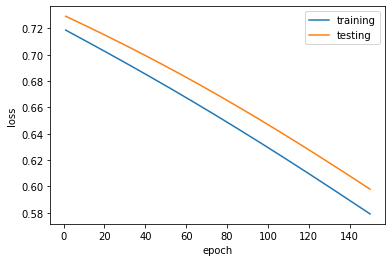

In [ ]:
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, testing_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'testing'], loc='upper right')
plt.show()

In [ ]:
# Menyimpan model training
model_file = 'wheatseeds_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('model saved as', model_file)

model saved as wheatseeds_classifier.pt


Testing data menggunakan model yang sudah disimpan

In [ ]:
dataiter = iter(test_loader)
inputs, labels = dataiter.next() 

model = Network()
model.load_state_dict(torch.load(model_file))
outputs = model(inputs)
__, predicted = torch.max(outputs, 1)

In [ ]:
# Menghitung akurasi
correct, total = 0, 0

with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    __, predicted = torch.max(outputs.data, 1)
    # update results
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    print(f'Akurasi neural network: {100 * correct // total} %')
print(f'Akurasi neural network pada {len(test_ds)} test data: {100 * correct // total} %')

Akurasi neural network: 60 %
Akurasi neural network: 75 %
Akurasi neural network: 73 %
Akurasi neural network: 72 %
Akurasi neural network: 73 %
Akurasi neural network: 73 %
Akurasi neural network: 72 %
Akurasi neural network: 72 %
Akurasi neural network: 71 %
Akurasi neural network: 69 %
Akurasi neural network: 69 %
Akurasi neural network: 67 %
Akurasi neural network: 69 %
Akurasi neural network pada 252 test data: 69 %


# Evaluation of Model

Evaluasi digunakan untuk melihat apakah model yang dibuat sudah mampu menghasilkan prediksi yang sesuai dengan output aslinya. Akurasi dari model dapat divisualisasikan menggunakan confusion matrix.

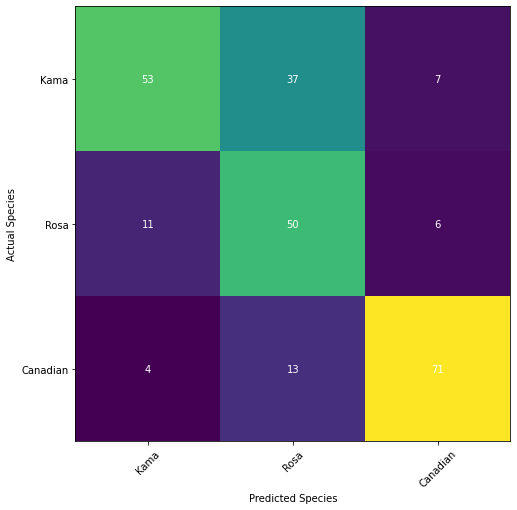

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Prediksi dari test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
tick_marks = np.arange(len(seeds_classes))
plt.xticks(tick_marks, seeds_classes, rotation=45)
plt.yticks(tick_marks, seeds_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# Using Trained Model for New Input

In [ ]:
# data baru
x = [[5.234,3.111,1.820,5.000]]
x = torch.Tensor(x).float()

# load model training
model = Network()
model.load_state_dict(torch.load(model_file))

# Output model
outputs = model(x).data
__, predicted = torch.max(outputs, 1)

print('Prediction:',seeds_classes[predicted.item()])

Prediction: Kama
